# Figures 3, 3-1, 3-8, 3-9, 5, & 5-1

Neurophysiological differentiation results

In [1]:
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import analysis

In [2]:
matplotlib.rcParams.update({'font.size': 16})

In [3]:
OUTPUT_DIR = Path('figures')

## Plotting function

In [4]:
def plot_differences(data, response, a, b, output_dir, tick_spacing=None):
    # Compute differences
    differences = analysis.compute_difference(
        data,
        response,
        a=a,
        b=b,
        op="mean",
        groups=("stimulus_type", "session"),
    )

    # Plot
    for x in ["layer", "area"]:
        print(f"  Plotting {x}")
        fig, ax = analysis.boxplot(
            data=differences,
            x=x,
            y="difference",
            width=5,
            height=5,
            hline=0.0,
        )
        if tick_spacing is not None:
            ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacing))
        analysis.savefig(fig, output_dir / f"nd_differences__by_{x}")

    print("  Plotting layer/area")
    fig, axes, grid = analysis.faceted_plot(
        data=differences,
        y="difference",
        row="layer",
        col="area",
        box=False,
        mean=True,
        height=3,
        aspect=0.55,
        hline=0,
        s=8,
    )
    if tick_spacing is not None:
        ax.yaxis.set_major_locator(plt.MultipleLocator(tick_spacing))
    analysis.savefig(fig, output_dir / "nd_differences__by_layer-area")

In [5]:
def effect_sizes(subset, response, a='unscrambled', b='scrambled', label_col="stimulus_type"):
    for grouping in ['layer', 'area']:
        effect_size_layer = (
            subset
            .groupby(grouping)
            .apply(
                analysis.cohens_d,
                a=a,
                b=b,
                value_col=response,
                label_col=label_col,
            )
        )
        display(effect_size_layer)

## Load data

In [6]:
main = pd.read_parquet('results/main.parquet')

In [7]:
mean_centroid_distance = pd.read_parquet('results/mean_centroid_distance.parquet')

In [8]:
mean_centroid_distance_events = pd.read_parquet('results/mean_centroid_distance__events.parquet')

In [9]:
no_transients = pd.read_parquet('results/main__no-transients.parquet')

## Figure 3

Spectral differentiation (unscrambled vs. scrambled)

In [10]:
response = 'log(normalized differentiation)'

In [11]:
a = 'unscrambled'
b = 'scrambled'

In [12]:
# Unscrambled vs. scrambled stimuli

subset_fig3 = (
    main
    .loc[main["stimulus_is_scrambled_pair"]]
    .copy()
)
subset_fig3["stimulus_type"] = subset_fig3["stimulus_type"].map(
    dict(
        natural=a,
        artificial=b,
    )
)
subset_fig3.shape

(2200, 33)

In [13]:
output_dir = OUTPUT_DIR / "fig_3"

Averaging over 2200 values
  Plotting layer
  Plotting area
  Plotting layer/area


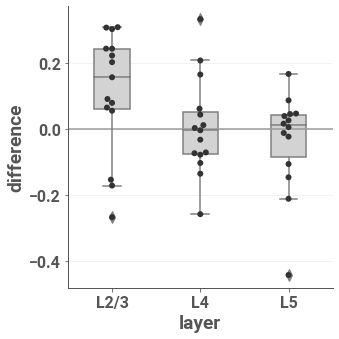

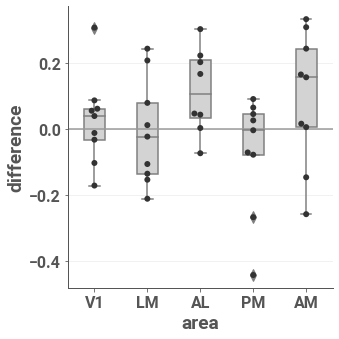

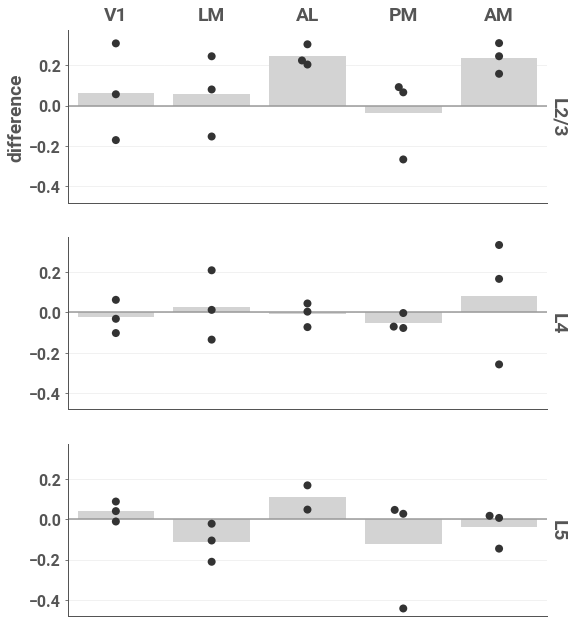

In [14]:
plot_differences(
    subset_fig3,
    response,
    a=a,
    b=b,
    output_dir=output_dir,
)

In [15]:
effect_sizes(subset_fig3, response=response, a=a, b=b)

,mean difference,Cohen's d
layer,,
L2/3,0.113259,0.163897
L4,0.005594,0.011248
L5,-0.035425,-0.067084


,mean difference,Cohen's d
area,,
V1,0.026602,0.054311
LM,-0.008836,-0.015521
AL,0.115221,0.199647
PM,-0.069673,-0.122258
AM,0.092470,0.127811


## Figure 3-1

Spectral differentiation (natural vs. artificial stimuli)

In [16]:
response = 'log(normalized differentiation)'

In [17]:
a = 'natural'
b = 'artificial'

In [18]:
# Select all 12 stimuli presented in the block design
subset_fig3_1 = main.loc[
    main['stimulus_is_block']
]
subset_fig3_1.shape

(5280, 33)

In [19]:
output_dir = OUTPUT_DIR / "fig_3-1"

Averaging over 5280 values
  Plotting layer
  Plotting area
  Plotting layer/area


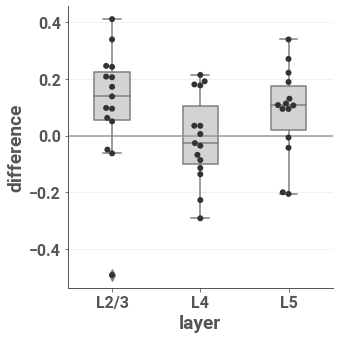

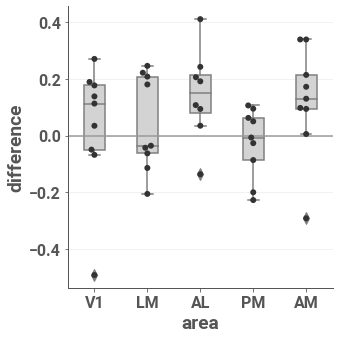

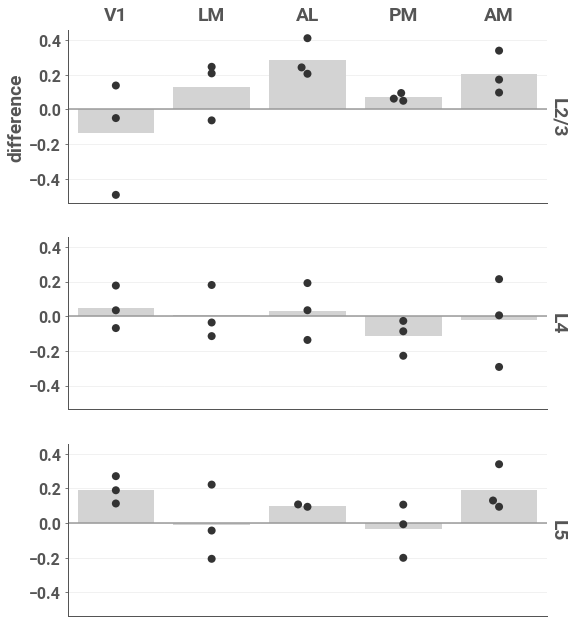

In [20]:
plot_differences(
    subset_fig3_1,
    response,
    a=a,
    b=b,
    output_dir=output_dir,
)

In [21]:
effect_sizes(subset_fig3_1, response=response, a=a, b=b)

,mean difference,Cohen's d
layer,,
L2/3,0.110855,0.153324
L4,-0.010023,-0.018774
L5,0.086382,0.144450


,mean difference,Cohen's d
area,,
V1,0.034708,0.065811
LM,0.043779,0.073839
AL,0.143804,0.222180
PM,-0.026075,-0.040116
AM,0.122188,0.155765


## Figure 3-8

Spectral differentiation (unscrambled vs. scrambled stimuli; events)

In [22]:
events = pd.read_parquet('results/main__events.parquet')

In [23]:
response = 'log(normalized differentiation)'

In [24]:
a = 'unscrambled'
b = 'scrambled'

In [25]:
events = (
    events
    .replace(-np.inf, np.nan)
    .dropna(subset=[response])
)

In [26]:
# Unscrambled vs. scrambled stimuli

subset_fig3_8 = (
    events
    .loc[events["stimulus_is_scrambled_pair"]]
    .copy()
)
subset_fig3_8["stimulus_type"] = subset_fig3_8["stimulus_type"].map(
    dict(
        natural=a,
        artificial=b,
    )
)
subset_fig3_8.shape

(2196, 33)

In [27]:
output_dir = OUTPUT_DIR / "fig_3-8"

Averaging over 2196 values
  Plotting layer
  Plotting area
  Plotting layer/area


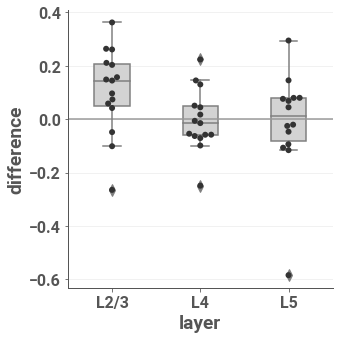

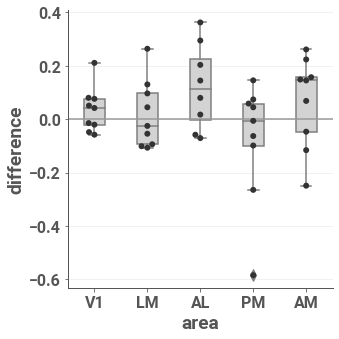

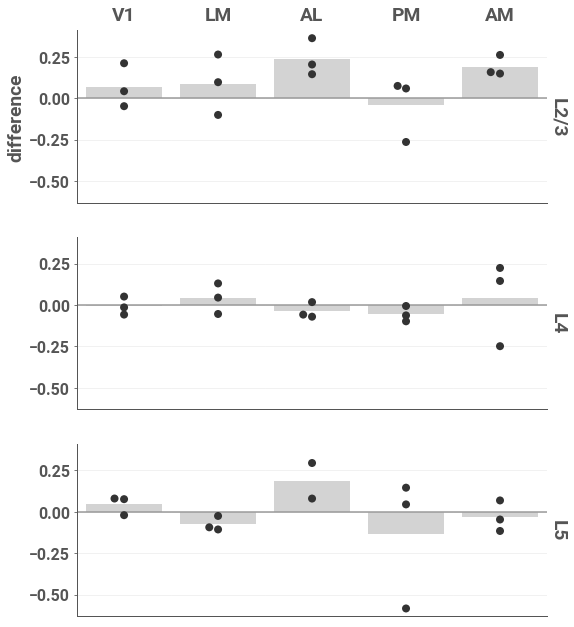

In [28]:
plot_differences(
    subset_fig3_8,
    response,
    a=a,
    b=b,
    output_dir=output_dir,
)

In [29]:
effect_sizes(subset_fig3_8, response=response, a=a, b=b)

,mean difference,Cohen's d
layer,,
L2/3,0.107020,0.175400
L4,-0.004310,-0.009889
L5,-0.016785,-0.031831


,mean difference,Cohen's d
area,,
V1,0.032758,0.076208
LM,0.014071,0.027034
AL,0.121416,0.226402
PM,-0.077342,-0.151240
AM,0.065605,0.098363


## Figure 3-9

Spectral differentiation (unscrambled vs. scrambled; no transients)

In [30]:
response = 'log(normalized differentiation)'

In [31]:
# Unscrambled vs. scrambled stimuli

subset_fig3_9 = (
    no_transients
    .loc[no_transients["stimulus_is_scrambled_pair"]]
    .copy()
)
subset_fig3_9["stimulus_type"] = subset_fig3_9["stimulus_type"].map(
    dict(
        natural=a,
        artificial=b,
    )
)
subset_fig3_9.shape

(2200, 33)

In [32]:
output_dir = OUTPUT_DIR / "fig_3-9"

Averaging over 2200 values
  Plotting layer
  Plotting area
  Plotting layer/area


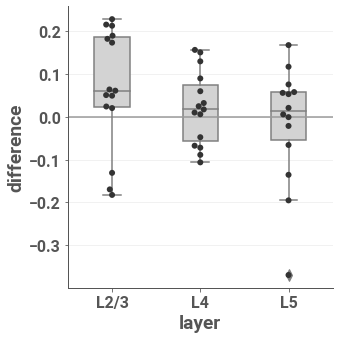

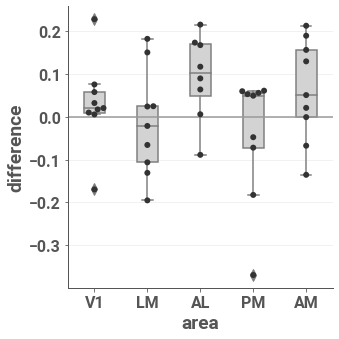

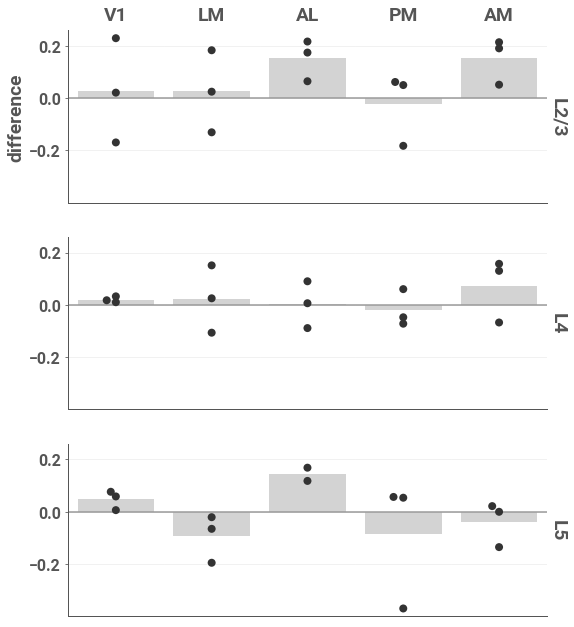

In [33]:
plot_differences(
    subset_fig3_9,
    response,
    a=a,
    b=b,
    output_dir=output_dir,
)

In [34]:
effect_sizes(subset_fig3_9, response=response, a=a, b=b)

,mean difference,Cohen's d
layer,,
L2/3,0.066343,0.175528
L4,0.019984,0.056756
L5,-0.016404,-0.035691


,mean difference,Cohen's d
area,,
V1,0.031257,0.094621
LM,-0.014989,-0.035426
AL,0.093526,0.257336
PM,-0.043300,-0.096610
AM,0.062258,0.125076


## Figure 5

Mean centroid distance (unscrambled vs. scrambled stimuli)

In [35]:
data = mean_centroid_distance

In [36]:
response = 'log(mean_centroid_distance)'

In [37]:
a = 'unscrambled'
b = 'scrambled'

In [38]:
subset_fig5 = (
    data
    .loc[data["stimulus_is_scrambled_pair"]]
    .copy()
)
subset_fig5["stimulus_type"] = subset_fig5["stimulus_type"].map(
    dict(
        natural=a,
        artificial=b,
    )
)
subset_fig5.shape

(2200, 28)

In [39]:
output_dir = OUTPUT_DIR / "fig_5"

Averaging over 2200 values
  Plotting layer
  Plotting area
  Plotting layer/area


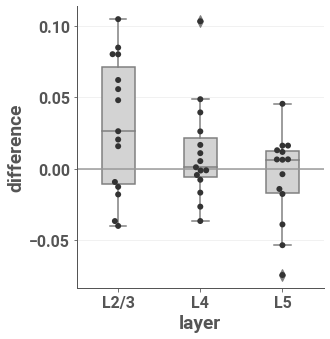

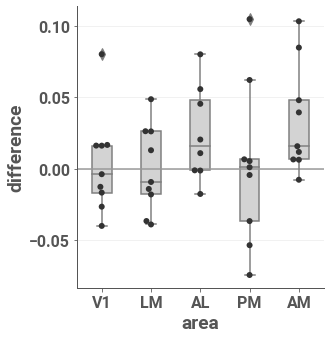

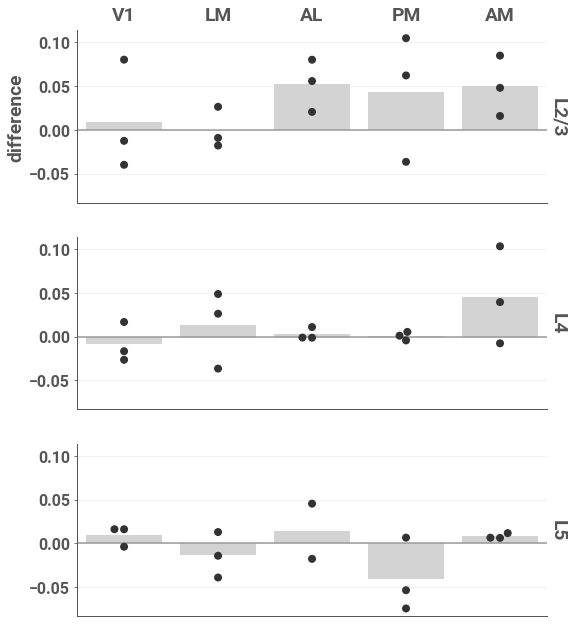

In [40]:
plot_differences(
    subset_fig5,
    response,
    a=a,
    b=b,
    output_dir=output_dir,
    tick_spacing=0.05,
)

In [41]:
effect_sizes(subset_fig5, response=response, a=a, b=b)

,mean difference,Cohen's d
layer,,
L2/3,0.030702,0.193995
L4,0.010430,0.099360
L5,-0.005786,-0.065118


,mean difference,Cohen's d
area,,
V1,0.003235,0.028124
LM,-0.000364,-0.002693
AL,0.024017,0.183795
PM,0.001174,0.011883
AM,0.034160,0.277198


## Figure 5-1

Mean centroid distance (events)

In [42]:
data = mean_centroid_distance_events

In [43]:
response = 'log(mean_centroid_distance)'

In [44]:
a = 'unscrambled'
b = 'scrambled'

In [45]:
output_dir = OUTPUT_DIR / "fig_5-1"

In [46]:
subset_fig5_1 = (
    data
    .loc[data["stimulus_is_scrambled_pair"]]
    .copy()
)
subset_fig5_1["stimulus_type"] = subset_fig5_1["stimulus_type"].map(
    dict(
        natural="unscrambled",
        artificial="scrambled",
    )
)
subset_fig5_1.shape

(2200, 28)

Averaging over 2200 values
  Plotting layer
  Plotting area
  Plotting layer/area


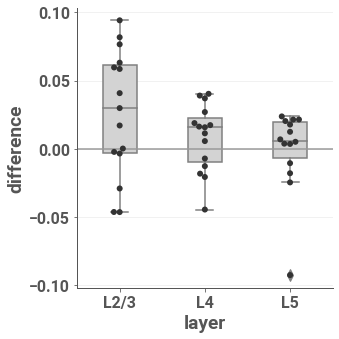

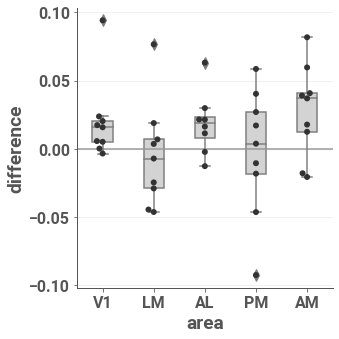

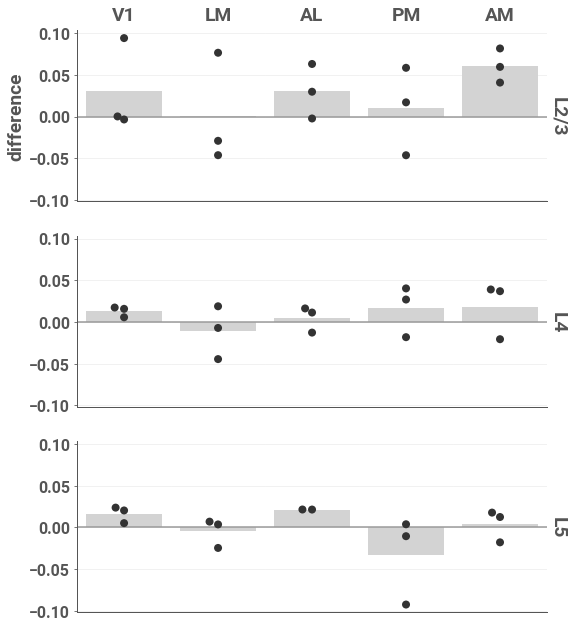

In [47]:
plot_differences(
    subset_fig5_1,
    response,
    a=a,
    b=b,
    output_dir=output_dir,
    tick_spacing=0.05,
)

In [48]:
effect_sizes(subset_fig5_1, response=response, a=a, b=b)

,mean difference,Cohen's d
layer,,
L2/3,0.026279,0.177906
L4,0.008361,0.061070
L5,-0.000633,-0.003769


,mean difference,Cohen's d
area,,
V1,0.019881,0.166856
LM,-0.005067,-0.045072
AL,0.018567,0.099992
PM,-0.002325,-0.015960
AM,0.027757,0.158390
